In [1]:
from IPython.core.display import HTML
with open('../style.css') as file:
    css = file.read()
HTML(css)

# Topological Sorting

The function `topo_sort` implements <em style="color:blue">Kahn's algorithm</em> for 
<em style="color:blue">topological sorting</em>.
- The first argument `T` is the set of the nodes of the directed graph.
- The second argument `D` is the set of the edges. Edges are represented as pairs.

The function returns a list `Sorted` that contains all nodes of $T$.  If
`Sorted[i] = x`, `Sorted[j] = y`, and `(x, y) in D`,
then we must have `i < j`.

In [2]:
def topo_sort(T, D):
    Parents  = { t: set() for t in T }  # dictionary of parents
    Children = { t: set() for t in T }  # dictionary of children
    for s, t in D:
        Children[s].add(t)
        Parents [t].add(s)
    Orphans = { t for (t, P) in Parents.items() if len(P) == 0 }
    Sorted  = []
    count   = 0
    while len(T) > 0:
        assert Orphans != set(), 'The graph is cyclic!'
        t        = Orphans.pop()
        count   += 1
        Orphans -= { t }
        T       -= { t }
        Sorted.append(t)
        for s in Children[t]:
            Parents[s] -= { t }
            if Parents[s] == set():
                Orphans.add(s)
    return Sorted

In [3]:
def topo_sort(T, D):
    print('_' * 100)        
    display(toDot(D))
    Parents  = { t: set() for t in T }  # dictionary of parents
    Children = { t: set() for t in T }  # dictionary of children
    for s, t in D:
        Children[s].add(t)
        Parents [t].add(s)
    Orphans = { t for (t, P) in Parents.items() if len(P) == 0 }
    Sorted  = []
    count   = 0
    Order   = {}
    while len(T) > 0:
        assert Orphans != set(), 'The graph is cyclic!'
        t        = Orphans.pop()
        Order[t] = count
        count   += 1
        Orphans -= { t }
        T       -= { t }
        Sorted.append(t)
        for s in Children[t]:
            Parents[s] -= { t }
            if Parents[s] == set():
                Orphans.add(s)
        print('_' * 80)        
        display(toDot(D, Order))     
    return Sorted

# Graphical Representation

In [4]:
import graphviz as gv

The function `toDot(Edges, Order)` takes two arguments:
- `Edges` is a set of pairs of the form `(x, y)` where `x` and `y` are nodes of a graph
  and `(x, y)` is a directed edge from `x`to `y`.
- `Order` is a dictionary assigning natural numbers to some of the nodes.

The set of edges is displayed as a directed graph and for those nodes `x` such that `Order[x]` is defined, both `x` and the label `Order[x]` is depicted.

In [5]:
def toDot(Edges, Order={}):
    V = set()
    for x, y in Edges:
        V.add(x)
        V.add(y)
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    dot.attr(rankdir='LR', size='8,5')
    for x in V:
        o = Order.get(x, None)
        if o != None:
            dot.node(str(x), label='{' + str(x) + '|' + str(o) + '}')
        else:
            dot.node(str(x))
    for u, v in Edges:
        dot.edge(str(u), str(v))
    return dot

# Testing

In [6]:
def demo():
    T = { 5, 7, 3, 11, 8, 2, 9, 10 }
    D = { (5, 11), (7, 11), (7, 8), (3, 8), (3, 10), (11, 2), (11, 9), (11, 10), (8, 9) }
    S = topo_sort(T, D)
    print(S)

____________________________________________________________________________________________________


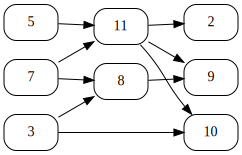

________________________________________________________________________________


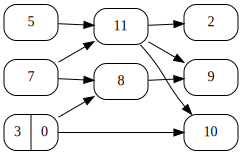

________________________________________________________________________________


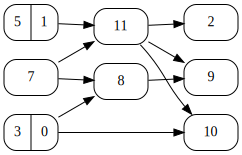

________________________________________________________________________________


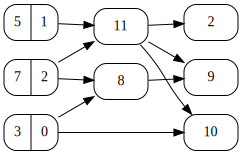

________________________________________________________________________________


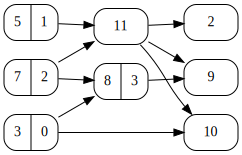

________________________________________________________________________________


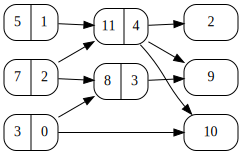

________________________________________________________________________________


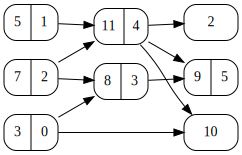

________________________________________________________________________________


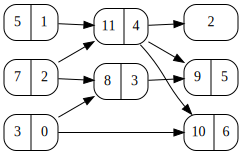

________________________________________________________________________________


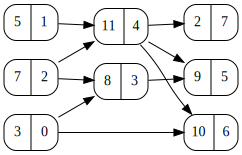

[3, 5, 7, 8, 11, 9, 10, 2]


In [7]:
demo()